# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders or business users who are interested in opening an **Indian restaurant** in **Toronto**, Canada.

To find the neighborhood and venues locations we will user Python Data science with all the visualization of the data.

## Data <a name="data"></a>

We will need some sources for collecting the data which are as follows:

    1. We need Boroughs, Neighborhoods, Latitudes, Longitudes of Canada so that we can get Toronto and its neighborhoods.
       Data Source: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
         
    2. To get the neighborhoods, venues, indian restaurant etc data, we will use FourSquare api.
       Data Source: https://foursquare.com/

So Lets import some important libraries that we will use while using Data Science

In [1]:
import pandas as pd
import requests
!pip install lxml
import lxml

     |████████████████████████████████| 5.5MB 18.0MB/s eta 0:00:01


<h2> Importing Wikipedia Data </h2>

In [2]:

wiki_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
get_wiki = requests.get(wiki_url)
get_wiki

<Response [200]>

Usind Pandas library to read html data came from wikipedia

In [3]:
wikiData = pd.read_html(get_wiki.text)
wikiData

[    Postal Code           Borough  \
 0           M1A      Not assigned   
 1           M2A      Not assigned   
 2           M3A        North York   
 3           M4A        North York   
 4           M5A  Downtown Toronto   
 ..          ...               ...   
 175         M5Z      Not assigned   
 176         M6Z      Not assigned   
 177         M7Z      Not assigned   
 178         M8Z         Etobicoke   
 179         M9Z      Not assigned   
 
                                          Neighbourhood  
 0                                         Not assigned  
 1                                         Not assigned  
 2                                            Parkwoods  
 3                                     Victoria Village  
 4                            Regent Park, Harbourfront  
 ..                                                 ...  
 175                                       Not assigned  
 176                                       Not assigned  
 177                

Get the first table from the whole data which is at 0th index
Data consists of three coloumns Postal Code, Borough, Neighborhood

In [4]:
data=wikiData[0]
data

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


Create dataframe which does not consist Borough as Not assigned

In [5]:
dataframe = data[data['Borough'] != 'Not assigned']
dataframe

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [6]:
dataframe= dataframe.groupby(['Postal Code']).head()
dataframe

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [7]:
dataframe.astype(str)
dataframe.Neighbourhood.str.count("Not assigned").sum()

0

As we removed Not Assigned entries so will set the index again

In [8]:
dataframe = dataframe.reset_index()
dataframe

,index,Postal Code,Borough,Neighbourhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,5,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...,...
98,160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,165,M4Y,Downtown Toronto,Church and Wellesley
100,168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


## Below piece of code will make the table with proper format with borders wherever is the table in the current notebook

In [9]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [10]:
dataframe.head()

,index,Postal Code,Borough,Neighbourhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,5,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


# As index coloum is not in proper number so we will drop it

In [11]:
dataframe.drop(['index'],axis=1, inplace=True)
dataframe

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


# Methodology

Collect the Toronto, Canada data from url and with Foursquare api we will get all venues for each neighborhood.
After that we filter the data to get Indian Restaurant venue.
Using Folium to get Map of city and used other visualization techniques also.
Analyzing using Clustering K-Means:
1. Find the best value of K
2. Visualize the neighborhood with a number of Indian Restaurants.
Compare the Neighborhoods to find the Best Place for Starting up a Restaurant.

At last, get the results whether we will open restaurant or not.

In [12]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 102kB 6.9MB/s ta 0:00:011


# We will read Geospatial Data that contains Postal Codes with Latitudes and Londitudes coloumn

In [13]:
geoData = pd.read_csv('http://cocl.us/Geospatial_data')
geoData.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [14]:
geoData.shape

(103, 3)

In [15]:
print(geoData.dtypes,dataframe.dtypes)

Postal Code     object
Latitude       float64
Longitude      float64
dtype: object Postal Code      object
Borough          object
Neighbourhood    object
dtype: object


# Merging of both dataframes i.e. dataframe that we created from wikipedia data and geospatial data

In [16]:
geoframe = pd.merge(dataframe,geoData)
geoframe

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


Installing geopy library

In [17]:
!pip install geopy
from geopy.geocoders import Nominatim

     |████████████████████████████████| 112kB 9.8MB/s eta 0:00:01


As we have to find Restaurant in Toronto, we will use this address and there neighborhoods locations

In [18]:
address = 'Toronto'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [19]:
torontoData = geoframe[geoframe['Borough'].str.contains('Toronto')]
torontoData.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


# Importing folium to create Map with Neighborhoods in Toronto

In [20]:
import folium
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(geoframe['Latitude'], geoframe['Longitude'], geoframe['Borough'], geoframe['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# Using Foursquare credentials that we created while signup and will get the venues in Toronto

In [21]:
CLIENT_ID = 'VXACDTWRJELPRUV34YMII1A11DKHNCMB2SGH3G2ODTDBQLIH' # your Foursquare ID
CLIENT_SECRET = '0DFR2AXHNPBB04D5OVS5GUOGOE4OE5C3IIKCSGQ2544QVWWB' # your Foursquare Secret
#ACCESS_TOKEN = 'L5IUOZWQB31Y3UUTUAMYLHHHKS5QFD3ZDRK0DHVG1QKYBIGC' # your FourSquare Access Token
VERSION = '20180604'
#LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VXACDTWRJELPRUV34YMII1A11DKHNCMB2SGH3G2ODTDBQLIH
CLIENT_SECRET:0DFR2AXHNPBB04D5OVS5GUOGOE4OE5C3IIKCSGQ2544QVWWB


# Creating a function to get the nearby venues list of Toronto

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
toronto_venues = getNearbyVenues(names=geoframe['Neighbourhood'],
                                   latitudes=geoframe['Latitude'],
                                   longitudes=geoframe['Longitude']
                                  )
toronto_venues

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
...,...,...,...,...,...,...,...
1314,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,McDonald's,43.630007,-79.518041,Fast Food Restaurant
1315,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Royal Canadian Legion #210,43.628855,-79.518903,Social Club
1316,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Koala Tan Tanning Salon & Sunless Spa,43.631370,-79.519006,Tanning Salon
1317,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Kingsway Boxing Club,43.627254,-79.526684,Gym


Let's check how many venues were returned for each neighborhood

In [24]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
...,...,...,...,...,...,...
"Willowdale, Willowdale East",30,30,30,30,30,30
"Willowdale, Willowdale West",6,6,6,6,6,6
Woburn,4,4,4,4,4,4


In [25]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 236 uniques categories.


In [26]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
toronto_onehot.shape

(1319, 237)

# Analysis

There are 237 unique categories in which Indian Restaurant is one of them. We will do one hot encoding for getting dummies of the 
venue category. So that we will calculate the mean of all venue groups by their neighborhoods.


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [28]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,"Willowdale, Willowdale East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0
91,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
92,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
93,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
toronto_grouped.shape

(95, 237)

# As we have to find Indian Restaurant venue from each neighborhood so we will extract only those coloumns

In [30]:
toronto_grouped_restaurant=toronto_grouped[['Neighbourhood', 'Indian Restaurant']]
toronto_grouped_restaurant

,Neighbourhood,Indian Restaurant
0,Agincourt,0.00
1,"Alderwood, Long Branch",0.00
2,"Bathurst Manor, Wilson Heights, Downsview North",0.00
3,Bayview Village,0.00
4,"Bedford Park, Lawrence Manor East",0.04
...,...,...
90,"Willowdale, Willowdale East",0.00
91,"Willowdale, Willowdale West",0.00
92,Woburn,0.00
93,Woodbine Heights,0.00


## 4. Cluster Neighborhoods

Run _k_-means to cluster the neighborhood into 5 clusters.

In [31]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# Let's crete a new dataframe which contains all the information with clusters

In [32]:
# add clustering labels
toronto_grouped_restaurant.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = geoframe

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_grouped_restaurant.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,4.0,0.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,0.0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,0.0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,0.0
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,0.0


In [33]:
toronto_merged_dropna = toronto_merged.dropna(subset=['Cluster Labels'])

Finally, let's visualize the resulting clusters

In [34]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_dropna['Latitude'], toronto_merged_dropna['Longitude'], toronto_merged_dropna['Neighbourhood'], toronto_merged_dropna['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster)+1) + '\n' + str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. 
Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

In [35]:
toronto_merged_dropna.loc[toronto_merged_dropna['Cluster Labels'] == 0, toronto_merged_dropna.columns[[1] + list(range(5, toronto_merged_dropna.shape[1]))]]

,Borough,Cluster Labels,Indian Restaurant
6,Scarborough,0.0,0.0


In [36]:
toronto_merged_dropna.loc[toronto_merged_dropna['Cluster Labels'] == 1, toronto_merged_dropna.columns[[1] + list(range(5, toronto_merged_dropna.shape[1]))]]

,Borough,Cluster Labels,Indian Restaurant
1,North York,1.0,0.000000
2,Downtown Toronto,1.0,0.000000
3,North York,1.0,0.000000
4,Downtown Toronto,1.0,0.000000
7,North York,1.0,0.000000
...,...,...,...
96,Downtown Toronto,1.0,0.033333
97,Downtown Toronto,1.0,0.000000
99,Downtown Toronto,1.0,0.033333
100,East Toronto,1.0,0.000000


In [37]:
toronto_merged_dropna.loc[toronto_merged_dropna['Cluster Labels'] == 2, toronto_merged_dropna.columns[[1] + list(range(5, toronto_merged_dropna.shape[1]))]]

,Borough,Cluster Labels,Indian Restaurant
12,Scarborough,2.0,0.0


In [38]:
toronto_merged_dropna.loc[toronto_merged_dropna['Cluster Labels'] == 3, toronto_merged_dropna.columns[[1] + list(range(5, toronto_merged_dropna.shape[1]))]]

,Borough,Cluster Labels,Indian Restaurant
57,North York,3.0,0.0
101,Etobicoke,3.0,0.0


In [39]:
toronto_merged_dropna.loc[toronto_merged_dropna['Cluster Labels'] == 4, toronto_merged_dropna.columns[[1] + list(range(5, toronto_merged_dropna.shape[1]))]]

,Borough,Cluster Labels,Indian Restaurant
0,North York,4.0,0.0
21,York,4.0,0.0
32,Scarborough,4.0,0.0
35,East York,4.0,0.0
52,North York,4.0,0.0
61,Central Toronto,4.0,0.0
66,North York,4.0,0.0
77,Etobicoke,4.0,0.0
85,Scarborough,4.0,0.0
91,Downtown Toronto,4.0,0.0


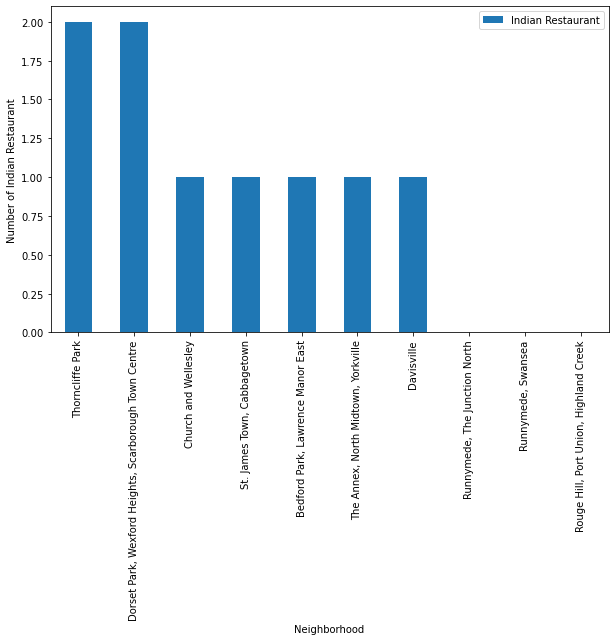

In [40]:
import matplotlib.pyplot as plt
restaurantgraph = pd.DataFrame(toronto_onehot.groupby('Neighbourhood')['Indian Restaurant'].sum())
restaurantgraph = restaurantgraph.sort_values(by='Indian Restaurant', ascending=False)
restaurantgraph.iloc[:10].plot(kind='bar', figsize=(10,6))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Indian Restaurant')
plt.show()

# Result

 Scarborough town centre and Thorncliffe part have highest number of Indian Restaurant.
 In cluster 1 at Downtown toronto, we have frequecy of Indian Restaurant so we can choose this one also.
 Rest of the clusters, we don't have any restaurant so we won't do any restaurant business here.

# Conclusion

Finally we will get a small glimpse of this project. So we have used various Python libraries to read html data, 
visualize the data etc. We also have used Foursquare Api to get the neighborhoods of the city to choose the location
for the restaurant. So this all analysis depended on the data get by the API itself not the real time.
We can take this project as a reference to work in future projects and real one also and then we can represent more
realistic pictures. 

# Discussion 


 As per our analysis, out of 5 clusters we have only one cluster where Indian Restaurant comes which is Downtown
 Toronto. So the frequecy of Indian Restaurant is not much in toronto. From this we can conclude two things.
 First, if Indian Restaurant is in Downtown that means that people likes indian food and we can open our restaurant
 there only and make the business. Second, in other place less or no restaurant are there so we can open there itself with 
 no other's competition but to come into this conclusion we will have to analyze more to get more information.
 
 Our analysis result could vary if we use other clustering techniques.